In [5]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as mfm
from matplotlib.patches import Rectangle, Circle, PathPatch, Arc
from mpl_toolkits.mplot3d import Axes3D 
import mpl_toolkits.mplot3d.art3d as art3d

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [6]:
from matplotlib.text import Text, TextPath
from matplotlib.transforms import Affine2D

# https://matplotlib.org/3.1.1/gallery/mplot3d/pathpatch3d.html
def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):
    '''
    Plots the string 's' on the axes 'ax', with position 'xyz', size 'size',
    and rotation angle 'angle'.  'zdir' gives the axis which is to be treated
    as the third dimension.  usetex is a boolean indicating whether the string
    should be interpreted as latex or not.  Any additional keyword arguments
    are passed on to transform_path.

    Note: zdir affects the interpretation of xyz.
    '''
    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "x":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)

In [7]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    """
    https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
    """
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [8]:
# 구글 colab 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
path = 'noviceml/font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

# 7장 행렬 : 데이터를 편리하게 다룰 도구
- 딥 러닝을 공부하기 위해 선형대수학을 꼼꼼히 공부해야 한다고 강조
    - 선형대수학이 벡터 변환에 관한 학문이기 때문
    - 딥러닝은 '한 벡터 공간을 다른 벡터 공간으로 매핑하기 위한 단순하고 연속된 기하학적 변환을 연결한 것'

- 데이터를 벡터와 행렬로 표현하고 코딩할 때는 '벡터화'라는 방식 사용

## 행렬과 벡터

### 행렬
- 행렬은 수(함수)들을 직사각형 모양으로 괄호안에 배열해 놓은 것

#### 행렬에 대한 연산
- 덧셈

In [9]:
# numpy에는 matrix와 array자료형 있음
A = np.matrix([[1,2],[3,4]])
B = np.matrix([[10,20],[30,40]])

A+B

matrix([[11, 22],
        [33, 44]])

- 스칼라 곱셈
    - 스칼라 곱은 행렬에 있는 모든 요소들을 스칼라 배

In [10]:
3*B

matrix([[ 30,  60],
        [ 90, 120]])

- 행렬곱
    - 각 행과 각 열을 짝지어 곱한 다음 모두 더함

In [11]:
A = np.array([[1,2,3], [4,5,6]]) #-----[1] 다차원배열(array) 생성
B = np.array([[2,1], [1,2], [1,1]])

np.dot(A,B) #-----[2] numpy의 dot() 함수를 통해 행렬곱

array([[ 7,  8],
       [19, 20]])

- 전치
    - 행렬의 행과 열을 바꾸는 것
    - np.transpose() 함수 사용

In [12]:
A = np.arange(1, 7).reshape(2, 3)
A

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
A.transpose(1, 0)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [14]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

#### 특별한 행렬
- 단위행렬
    - 행과 열 개수가 같고 대각 요소만 모두 1인 행렬
    - 단위행렬은 어떤 행렬 A를 곱해도 결과는 A (스칼라의 1과같음)

In [15]:
A = np.matrix([[2, 4], [4, 2]])
I = np.matrix(np.eye(2)) # np.eye()는 단위행렬을 만드는 함수

print(A*I)
print(I*A)

[[2. 4.]
 [4. 2.]]
[[2. 4.]
 [4. 2.]]


- 역행렬
    - 임의의 정사각행렬 A에 어떤행렬 B를 곱해서 단위행렬이 되면, B를 A의 역행렬이라고 함
    - 역행렬이 없는 행렬을 특이행렬, 역행렬이 있는 행렬을 정칙행렬이라고 함
    
- 대각행렬
    - 대각 요소만 값을 가지는 행렬
    - 단위행렬은 대각행렬의 특수한 경우
    - 대각행렬은 역행렬을 구하기 쉬움 : 대각 성분에 역수를 취하면 역행렬 구할 수 있음

In [16]:
D = np.matrix(np.eye(3)*np.array([2,1,4]))
D.I

matrix([[0.5 , 0.  , 0.  ],
        [0.  , 1.  , 0.  ],
        [0.  , 0.  , 0.25]])

In [18]:
D.I*D

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

- 대칭행렬
    - 정사각행렬 S에 대해 S.T = S를 만족하는 행렬을 대칭행렬이라고 함
    
- 대각화
    - 임의의 정사각행렬 A에 어떤 행렬을 앞, 뒤로 곱해서 대각행렬로 만드는 것을 말함

In [19]:
# 대각화 예시
A = np.matrix([[2, 4], [4, 2]])
X = np.matrix([[ 0.7071, -0.7071], [ 0.7071,  0.7071]])
D = X.I*A*X
D

matrix([[ 6.,  0.],
        [ 0., -2.]])

### 벡터
- 벡터는 크기와 방향을 모두 가지는 대상
- 숫자 여러 개가 모여 있는 어레이로 표현 가능
- 행 또는 열이 하나뿐인 행렬이라고도 할 수 있음

C:\Users\Minhyeok\AppData\Local\Temp/ipykernel_13460/518509758.py:14: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


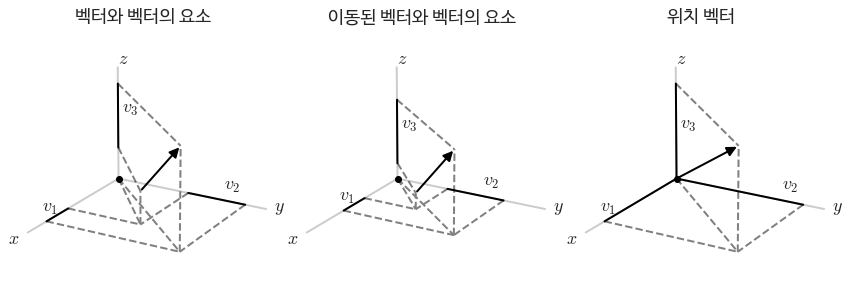

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
fig.set_size_inches((15,5))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.zaxis.set_tick_params(labelsize=15)

ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.zaxis.set_tick_params(labelsize=15)

ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.zaxis.set_tick_params(labelsize=15)

x, y, z = 0, 1, 2
P = np.array([1.5, 1.8, 1])

Q = np.array([2.1, 3.2, 3])
O = (0, 0, 0)

axis_length = Q + 0.5

def draw_vector(ax, P, Q, elev, azim, title=''):
    
    arrow = Arrow3D([P[x], Q[x]], [P[y], Q[y]], [P[z], Q[z]], lw=2, color='k',
                   mutation_scale=20, arrowstyle="-|>" )
    ax.add_artist(arrow)
    ax.axis('off')
    
    ax.plot3D([Q[x], Q[x]], [0, Q[y]], [0,0], '--', color="gray")
    ax.plot3D([P[x], P[x]], [0, P[y]], [0,0], '--', color="gray")

    ax.plot3D([0, Q[x]], [Q[y], Q[y]], [0,0], '--', color="gray")
    ax.plot3D([0, P[x]], [P[y], P[y]], [0,0], '--', color="gray")

    ax.plot3D([P[x], P[x]], [P[y], P[y]], [0, P[z]], '--', color="gray") #p로의 세로선
    ax.plot3D([Q[x], Q[x]], [Q[y], Q[y]], [0, Q[z]], '--', color="gray") #p로의 세로선

    ax.plot3D([0, P[x]], [0, P[y]], [0,0], '--', color="gray")
    ax.plot3D([0, Q[x]], [0, Q[y]], [0,0], '--', color="gray")

    ax.plot3D([0, P[x]], [0, P[y]], [P[z], P[z]], '--', color="gray")
    ax.plot3D([0, Q[x]], [0, Q[y]], [Q[z], Q[z]], '--', color="gray")

    ax.plot3D([P[x], Q[x]], [0, 0], [0,0], lw=2, color='k')
    ax.plot3D([0,0], [P[y], Q[y]], [0,0],  lw=2, color='k')
    ax.plot3D([0,0], [0, 0], [P[z], Q[z]], lw=2, color='k')

    # 축 그리기 
    ax.plot3D([O[x], axis_length[0]], [0, 0], [0, 0], color='k', alpha=0.2)
    ax.text(axis_length[0]+0.5, 0, 0, '$x$', fontsize=18)
    
    ax.plot3D([0,0], [O[y], axis_length[1]], [0, 0], color='k', alpha=0.2)
    ax.text(0, axis_length[1]+0.2, 0, '$y$', fontsize=18)
    
    ax.plot3D([O[x], 0], [O[y], 0], [O[z], axis_length[2]], color='k', alpha=0.2)
    ax.text(0, 0, axis_length[2]+0.1, '$z$', fontsize=18)
    
    ax.plot([O[x]], [O[y]], [O[z]], 'o', color='k')

    # 콤포넌트 그리기
    ax.text(P[x]+(Q[x]-P[x])-0.3, -0.4, 0, '$v_1$', fontsize=18)
    ax.text(-0.4, P[y]+(Q[y]-P[y])-0.8, 0, '$v_2$', fontsize=18)
    ax.text(0, 0.1,  P[z]+(Q[y]-P[z])/2,   '$v_3$', fontsize=18)

    ax.set_title(title, fontproperties=fontprop)
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel('$y$', fontsize=20)
    ax.set_zlabel('$z$', fontsize=20)
    
    ax.set_xlim((0, 2.5))
    ax.set_ylim((0, 3.5))
    ax.set_zlim((0, 3.5))
    
    ax.view_init(elev, azim)
    
draw_vector(ax1, P, Q, 20, 30, '벡터와 벡터의 요소')  
draw_vector(ax2, P-0.5, Q-0.5, 20, 30, '이동된 벡터와 벡터의 요소') 
draw_vector(ax3, O, Q, 20, 30, '위치 벡터') 

plt.subplots_adjust(hspace=0.05, wspace=0.0)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-1.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-1.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 화살표가 공간에 놓여있는 두 가지 경우
    - 1, 2번째는 임의의 위치에 화살표가 있고, 마지막은 화살표의 꼬리가 좌표축 원점에 위치
    - 화살표들은 벡터를 표시한 것
    - 1, 2번째 표시된 화살표는 크기와 방향이 같지만 위치는 서로 다름 (성분은 달라지지 않음)
    - 세번째처럼 벡터의 시작점을 고정하면 벡터의 끝점은 위치를 나타냄 (= 위치 벡터)
    - 요소의 개수를 벡터의 차원이라고 함

#### 벡터에 대한 연산 : 덧셈, 뺄셈과 스칼라 곱셈
- 스칼라 곱셈은 벡터의 모든 요소에 동일하게 스칼라 배
- 덧셈, 뺄셈은 두 벡터 간 차원이 같아야 함
    - 벡터는 방향이라는 물리적 의미가 중요하므로 덧, 뺄셈의 결과가 어떤 방향을 향하는 지 알아야 함

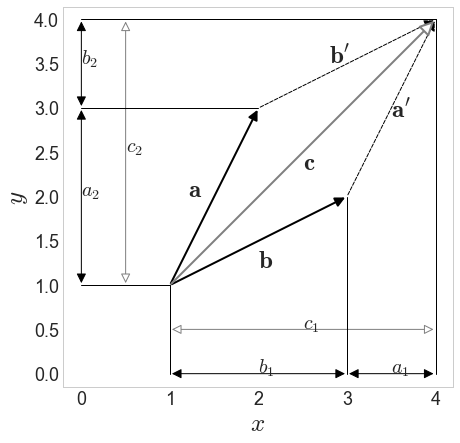

In [21]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)
ax.grid(False)

a = np.array( [[1, 1],[2, 3]] )
da = a[1]-a[0]

b = np.array( [[1, 1],[3, 2]] )
db = b[1]-b[0]


vec_a = FancyArrowPatch(a[0], a[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_a)

vec_b = FancyArrowPatch(b[0], b[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_b)

a_ = a + db # + db[1]
vec_a_ = FancyArrowPatch(a_[0], a_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_a_)

b_ = b + da
vec_b_ = FancyArrowPatch(b_[0], b_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_b_)

dc = da+db
c = a.copy()
c[1,:] = c[0,:]+dc
vec_c = FancyArrowPatch(c[0], c[1], lw=2, color='white', mutation_scale=30, arrowstyle="-|>", ec='gray')
ax.add_patch(vec_c)

# 가로 선
ax.plot( (0, a[0,0]),(a[0,1], a[0,1]), lw=1, color='k' )
ax.plot( (0, a[1,0]),(a[1,1], a[1,1]), lw=1, color='k' )
ax.plot( (0, a_[1,0]),(a_[1,1], a_[1,1]), lw=1, color='k' )

# 세로 선
ax.plot( (a[0,0], a[0,0]), (0, a[0,1]), lw=1, color='k' )
ax.plot( (b[1,0], b[1,0]), (0, b[1,1]), lw=1, color='k' )
ax.plot( (b_[1,0], b_[1,0]), (0, b_[1,1]), lw=1, color='k' )

vec_ay = FancyArrowPatch((0.0, a[0,1]), (0.0, a[1,1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ay)

vec_by = FancyArrowPatch((0.0, a[1,1]), (0.0, a[1,1]+db[1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_by)

vec_cy = FancyArrowPatch((0.5,c[0,1]), (0.5,c[1,1]), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cy)

vec_ax = FancyArrowPatch((a[0,0], 0.0), (b[1,0], 0.0), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ax)

vec_bx = FancyArrowPatch((b[1,0], 0.0), (a[1,1]+da[0], 0.0), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_bx)

vec_cx = FancyArrowPatch((c[0,0],0.5), (c[1,0],0.5), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cx)

ax.text(1.2, 2, r"$\mathbf{a}$", fontsize=25)
ax.text(3.5, 2.9, r"$\mathbf{a}'$", fontsize=25)
ax.text(2, 1.2, r"$\mathbf{b}$", fontsize=25)
ax.text(2.8, 3.5, r"$\mathbf{b}'$", fontsize=25)
ax.text(2.5, 2.3, r"$\mathbf{c}$", fontsize=25)

ax.text(0.5, 2.5, r"$c_2$", fontsize=20)
ax.text(0.0, 2.0, r"$a_2$", fontsize=20)
ax.text(0.0, 3.5, r"$b_2$", fontsize=20)

ax.text(2.5, 0.5, r"$c_1$", fontsize=20)
ax.text(2.0, 0.0, r"$b_1$", fontsize=20)
ax.text(3.5, 0.0, r"$a_1$", fontsize=20)

plt.axis('equal')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-2.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-2.pdf", format='pdf', bbox_inches='tight')
    
    
plt.show()

- 벡터 a와 b를 덧셈하여 만들어지는 벡터 c를 나타냄
    - 결과 벡터c는 두 벡터를 평행이동시켜 평행사변형을 만들었을 때 그것의 대각선벡터
    - 벡터 덧셈에서 결과벡터가 향하는 방향은 덧셈하는 두 벡터가 주어지면 한눈에 알 수 있음

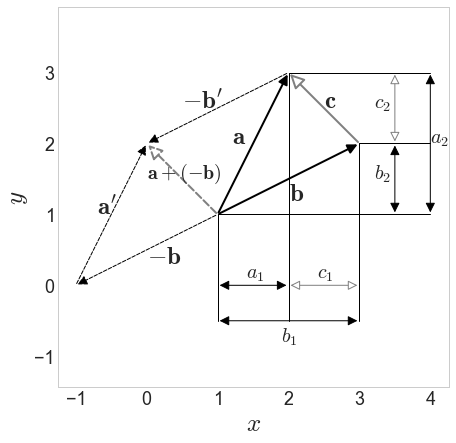

In [22]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)
ax.grid(False)

a = np.array( [[1, 1],[2, 3]] )
da = a[1]-a[0]

b = np.array( [[1, 1],[3, 2]] )
db = b[1]-b[0]

vec_a = FancyArrowPatch(a[0], a[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_a)

vec_b = FancyArrowPatch(b[0], b[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_b)

minus_b = b.copy()
minus_b[1,:] = minus_b[0,:]-db
vec_minus_b = FancyArrowPatch(minus_b[0], minus_b[1], ls='--', lw=1, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_minus_b)

a_ = a - db # + db[1]
vec_a_ = FancyArrowPatch(a_[0], a_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_a_)

b_ = minus_b + da
vec_b_ = FancyArrowPatch(b_[0], b_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_b_)

db_ = minus_b[1]-minus_b[0]
dc_ = da+db_
c_ = a.copy()
c_[1,:] = c_[0,:]+dc_
vec_c_ = FancyArrowPatch(c_[0], c_[1], lw=2, color='white', mutation_scale=30, arrowstyle="-|>", ec='gray', ls='--')
ax.add_patch(vec_c_)

dc = da-db
c = b.copy()
c[0,:] = c[1,:]
c[1,:] = c[0,:]+dc

vec_c = FancyArrowPatch(c[0], c[1], lw=2, color='white', mutation_scale=30, arrowstyle="-|>", ec='gray')
ax.add_patch(vec_c)

# 세로 선
ax.plot( (a[0,0], a[0,0]), (-0.5, a[0,1]), lw=1, color='k' )
ax.plot( (a[1,0], a[1,0]), (-0.5, a[1,1]), lw=1, color='k' )
ax.plot( (b[1,0], b[1,0]), (-0.5, b[1,1]), lw=1, color='k' )

# 가로 선
ax.plot( (a[0,0], 4), (a[0,1], a[0,1]), lw=1, color='k' )
ax.plot( (b[1,0], 4), (b[1,1], b[1,1]), lw=1, color='k' )
ax.plot( (a[1,0], 4), (a[1,1], a[1,1]), lw=1, color='k' )

vec_ay = FancyArrowPatch((4.0, a[0,1]), (4.0, a[1,1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ay)

vec_by = FancyArrowPatch((3.5, b[0,1]), (3.5, b[1,1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_by)

vec_cy = FancyArrowPatch((3.5, c[0,1]), (3.5,c[1,1]), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cy)

vec_bx = FancyArrowPatch((a[0,0], -0.5), (b[1,0], -0.5), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_bx)

vec_ax = FancyArrowPatch((a[0,0], 0.0), (a[1,0], 0.0), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ax)

vec_cx = FancyArrowPatch((c[0,0],0.0), (c[1,0],0.0), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cx)

ax.text(1.2, 2, r"$\mathbf{a}$", fontsize=25)
ax.text(-0.7, 1.0, r"$\mathbf{a}'$", fontsize=25)
ax.text(2, 1.2, r"$\mathbf{b}$", fontsize=25)
ax.text(0, 0.3, r"$-\mathbf{b}$", fontsize=25)
ax.text(0.5, 2.5, r"$-\mathbf{b}'$", fontsize=25)

ax.text(2.4, 0.1, r"$c_1$", fontsize=20)
ax.text(1.4, 0.1, r"$a_1$", fontsize=20)
ax.text(1.9, -0.8, r"$b_1$", fontsize=20)

ax.text(3.2, 2.5, r"$c_2$", fontsize=20)
ax.text(4.0, 2.0, r"$a_2$", fontsize=20)
ax.text(3.2, 1.5, r"$b_2$", fontsize=20)

ax.text(0, 1.5, r"$\mathbf{a}+(-\mathbf{b})$", fontsize=20)
ax.text(2.5, 2.5, r"$\mathbf{c}$", fontsize=25)

plt.axis('equal')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-3.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-3.pdf", format='pdf', bbox_inches='tight')
    
    
plt.show()

- 벡터a와 벡터b의 뺄셈을 나타냄
    - 결과 벡터 c는 b 머리에서 a 머리로 향하고 있음
    - 결과 벡터의 방향이 결정되는 방식은 a - b를 a + (-b)로 생각하면 직관적으로 이해가능

#### 벡터 노름
- 노름이란 벡터의 크기를 의미
- 주로 다루는 벡터의 크기는 L1 노름과 L2 노름이 있음

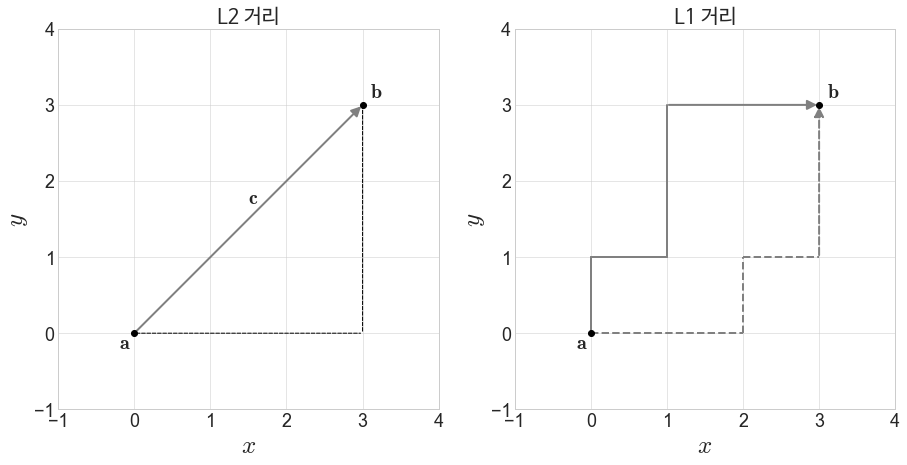

In [23]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylabel(r'$y$', fontsize=25)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylabel(r'$y$', fontsize=25)

a = np.array([0, 0])
b = np.array([3, 3])
vec_a = FancyArrowPatch((0, 0), (3, 0) , lw=1, mutation_scale=20, arrowstyle="-", color='k', ls='--')
ax1.add_patch(vec_a)

vec_b = FancyArrowPatch((3, 0), (3, 3) , lw=1, mutation_scale=20, arrowstyle="-", color='k', ls='--')
ax1.add_patch(vec_b)

c = np.array( [a, b] )
dc = c[1]-c[0]
vec_c = FancyArrowPatch(c[0], c[1], lw=2, mutation_scale=20, arrowstyle="-|>", color='gray')
ax1.add_patch(vec_c)

ax1.plot(*a, 'o', color='k')
ax1.plot(*b, 'o', color='k')

ax1.text(-0.2,-0.2, r"$\mathbf{a}$", fontsize=20)
ax1.text(3.1, 3.1, r"$\mathbf{b}$", fontsize=20)
ax1.text(1.5, 1.7, r"$\mathbf{c}$", fontsize=20)
ax1.set_title("L2 거리", fontsize=20, fontproperties=fontprop)
ax1.set_xlim(-1, 4)
ax1.set_ylim(-1, 4)

ax2.plot((0, 0), (0, 1), lw=2, color='gray')
ax2.plot((0, 1), (1, 1), lw=2, color='gray')
ax2.plot((1, 1), (1, 3), lw=2, color='gray')
# ax2.plot((1, 3), (3, 3), lw=2, color='gray')
vec_a = FancyArrowPatch((1, 3), (3, 3) , lw=2, mutation_scale=20, arrowstyle="-|>", color='gray')
ax2.add_patch(vec_a)

ax2.plot((0, 2), (0, 0), lw=2, ls='--', color='gray')
ax2.plot((2, 2), (0, 1), lw=2, ls='--', color='gray')
ax2.plot((2, 3), (1, 1), lw=2, ls='--', color='gray')
vec_b = FancyArrowPatch((3, 1), (3, 3) , lw=2, mutation_scale=20, ls='--', arrowstyle="-|>", color='gray')
ax2.add_patch(vec_b)

ax2.plot(*a, 'o', color='k')
ax2.plot(*b, 'o', color='k')
ax2.text(-0.2,-0.2, r"$\mathbf{a}$", fontsize=20)
ax2.text(3.1, 3.1, r"$\mathbf{b}$", fontsize=20)
ax2.set_title("L1 거리", fontsize=20, fontproperties=fontprop)
ax2.set_xlim(-1, 4)
ax2.set_ylim(-1, 4)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-4.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-4.pdf", format='pdf', bbox_inches='tight')

plt.show()

1. L2노름
    - 피타고라스 정리를 이용한 벡터의 크기
    - c의 요소를 제곱하여 더하고 루트를 씌운 것이 c의 길이가 됨
    
2. L1노름
    - 대각선으로 선을 그을 수 없다고 한다면, 오른쪽 그림처럼 됨
    - 어떤 경로를 따라가더라도 a와 b사이에 거리는 6
    - 맨해튼 거리라고도 함

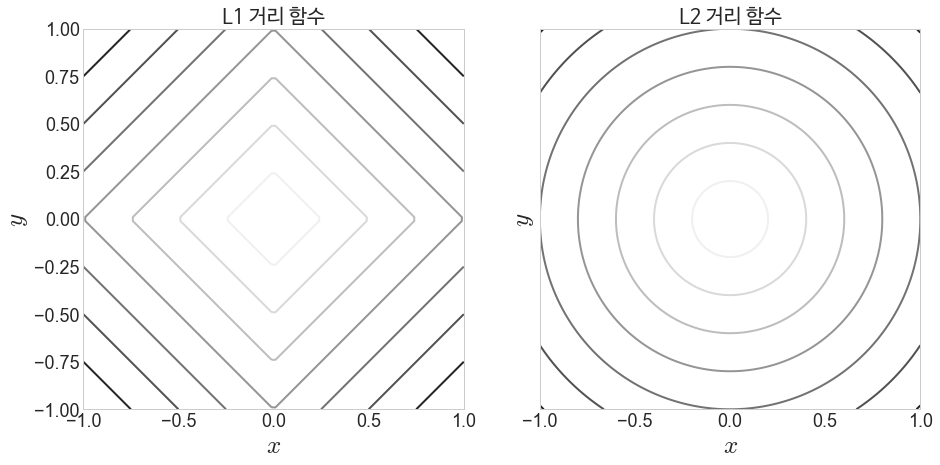

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches((15,7))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylabel(r'$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylabel(r'$y$', fontsize=25)
ax2.grid(False)

l1 = lambda x1, x2 : np.abs(x1) + np.abs(x2)
l2 = lambda x1, x2 : np.sqrt(x1**2 + x2**2)

x = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x, x)

L1 = l1(X1,X2)
L2 = l2(X1,X2)

ax1.contour(X1, X2, L1)
ax1.set_title("L1 거리 함수", fontsize=20, fontproperties=fontprop)
ax1.axis('equal')

ax2.contour(X1, X2, L2)
ax2.set_title("L2 거리 함수", fontsize=20, fontproperties=fontprop)
ax2.axis('equal')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-5.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 요소가 2개인 벡터에 대한 노름은 이변수 스칼라 함수
    - 주어진 벡터를 숫자 하나에 대응시키기 때문

- L1, L2 노름을 각각 이변수 스칼라 함수로 보고 그린 그림
    - 어떤 거리를 사용하는가에 따라 원점에서 떨어진 거리가 같은 지점이 다름을 알 수 있음
    
#### 단위벡터
- 벡터의 크기가 1인 벡터
- 단위벡터가 아닌 벡터를 단위벡터로 만들기 위해서는 벡터의 크기로 각 요소를 나누면 됨

#### 벡터의 내적과 외적
- 벡터끼리의 곱셈은 내적, 외적, 크로스적이 있음

1. 내적
    - 두 벡터에 대해 정의된 연산이며 두 벡터를 연산하여 스칼라 하나로 대응시킴
    - 두 벡터가 직교하면 내적값은 0 (= 내적값으로 직교여부 판단 가능)

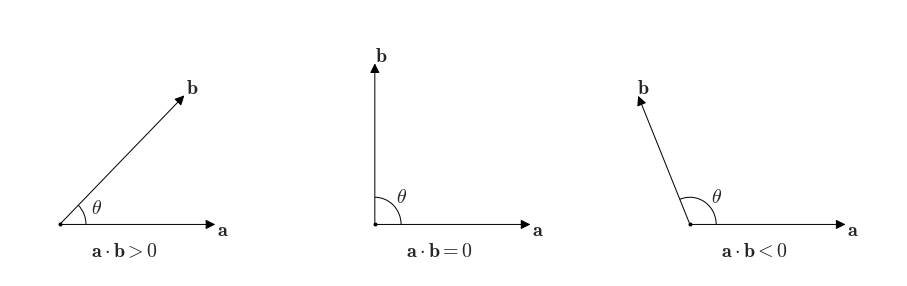

In [26]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


a = np.array([(1, 0.5), (2.5, 0.5)])
da = a[1]-a[0]
vec_a = FancyArrowPatch(a[0], a[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax1.add_patch(vec_a)

b = np.array([(1, 0.5), (2.2, 1.7)])
db = b[1]-b[0]
vec_b = FancyArrowPatch(b[0], b[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax1.add_patch(vec_b)
ax1.plot(*a[0], '.', color='k')

theta = 180*np.arccos(np.dot(da,db) / (np.linalg.norm(da)*np.linalg.norm(db)))/np.pi
e = Arc((1, 0.5), 0.5, 0.5, angle=0, theta1=0, theta2=theta,
        color='k',linewidth=1, fill=False, zorder=2)
ax1.add_patch(e)
ax1.text(1.3, 0.6, r"$\theta$", fontsize=20)
ax1.text(2.5, 0.4, r"$\mathbf{a}$", fontsize=20)
ax1.text(2.2, 1.7, r"$\mathbf{b}$", fontsize=20)
ax1.text(1.3, 0.2, r"$\mathbf{a}\cdot\mathbf{b}>0$", fontsize=20)
ax1.axis('off')
ax1.set_xlim(0.5, 3)
ax1.set_ylim(0, 2.5)

##################################################################################
a = np.array([(1, 0.5), (2.5, 0.5)])
da = a[1]-a[0]
vec_a = FancyArrowPatch(a[0], a[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax2.add_patch(vec_a)

b = np.array([(1, 0.5), (1, 2.)])
db = b[1]-b[0]
vec_b = FancyArrowPatch(b[0], b[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax2.add_patch(vec_b)
ax2.plot(*a[0], '.', color='k')

theta = 180*np.arccos(np.dot(da,db) / (np.linalg.norm(da)*np.linalg.norm(db)))/np.pi
e = Arc((1, 0.5), 0.5, 0.5, angle=0, theta1=0, theta2=theta,
        color='k',linewidth=1, fill=False, zorder=2)
ax2.add_patch(e)
ax2.text(1.2, 0.7, r"$\theta$", fontsize=20)
ax2.text(2.5, 0.4, r"$\mathbf{a}$", fontsize=20)
ax2.text(1, 2, r"$\mathbf{b}$", fontsize=20)
ax2.text(1.3, 0.2, r"$\mathbf{a}\cdot\mathbf{b}=0$", fontsize=20)
ax2.axis('off')
ax2.set_xlim(0.5, 3)
ax2.set_ylim(0, 2.5)

##################################################################################
a = np.array([(1, 0.5), (2.5, 0.5)])
da = a[1]-a[0]
vec_a = FancyArrowPatch(a[0], a[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax3.add_patch(vec_a)

b = np.array([(1, 0.5), (0.5, 1.7)])
db = b[1]-b[0]
vec_b = FancyArrowPatch(b[0], b[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax3.add_patch(vec_b)
ax3.plot(*a[0], '.', color='k')

theta = 180*np.arccos(np.dot(da,db) / (np.linalg.norm(da)*np.linalg.norm(db)))/np.pi
e = Arc((1, 0.5), 0.5, 0.5, angle=0, theta1=0, theta2=theta,
        color='k',linewidth=1, fill=False, zorder=2)
ax3.add_patch(e)
ax3.text(1.2, 0.7, r"$\theta$", fontsize=20)
ax3.text(2.5, 0.4, r"$\mathbf{a}$", fontsize=20)
ax3.text(0.5, 1.7, r"$\mathbf{b}$", fontsize=20)
ax3.text(1.3, 0.2, r"$\mathbf{a}\cdot\mathbf{b}<0$", fontsize=20)
ax3.axis('off')
ax3.set_xlim(0.5, 3)
ax3.set_ylim(0, 2.5)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-6.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-6.pdf", format='pdf', bbox_inches='tight')

plt.show()

2. 외적
    - 내적이 행벡터와 열벡터의 행렬곱이라면, 외적은 열벡터와 행벡터의 행렬곱
    - 결과는 행렬이 됨
    
- 내적은 결과가 스칼라이므로 스칼라곱, 외적은 결과가 행렬이므로 텐서곱이라고 부르기도 함

## 행렬을 이용한 데이터 표현

### 테이블형 데이터
- 입력데이터 x 벡터가 모여 있는 데이터세트 X를 행렬로 표시하는 것과 같음
- 데이터의 차원이 N, 데이터의 특징 수가 D개라면 데이터세트 X는 항상 (N, D) 행렬이 됨

### 이미지
- 이미지의 각 점을 숫자로 표현하고 각 점의 2차원 위치 정보를 행렬로 표현
- 흑백이미지의 경우는 행렬하나로 표현가능
- 컬러이미지의 경우 다차원 배열 (보통 R, G, B의 3차원)로 표현

In [27]:
def cube2d(ax, origin, dx=1, dy=1, dc=0.1, axis='off', hidden=False):
    x0, y0 = origin
    
    if hidden==False:
        ax.plot((x0, x0+dx), (y0, y0), lw=2, color='k')
        ax.plot((x0+dx, x0+dx), (y0, y0+dy), lw=2, color='k')
        ax.plot((x0+dx, x0), (y0+dy, y0+dy), lw=2, color='k')
        ax.plot((x0, x0), (y0+dy, y0), lw=2, color='k')

    ax.plot((x0, x0+dc), (y0+dy, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dx, x0+dx+dc), (y0+dy, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dx, x0+dx+dc), (y0, y0+dc), lw=2, color='k')
    
    ax.plot((x0+dc, x0+dx+dc), (y0+dy+dc, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dc, x0+dx+dc), (y0+dy+dc, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dx+dc, x0+dx+dc), (y0+dy+dc, y0+dc), lw=2, color='k')
    
    ax.axis(axis)

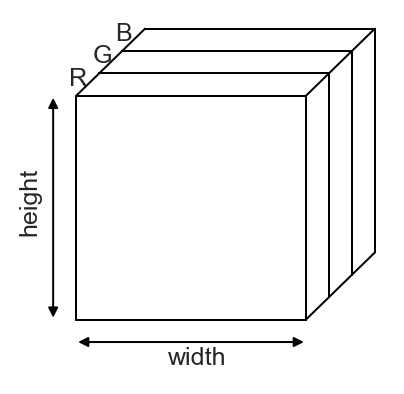

In [28]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
    
cube2d(ax, (0, 0))
cube2d(ax, (0.1, 0.1), hidden=True)
cube2d(ax, (0.2, 0.2), hidden=True)

width = FancyArrowPatch((0, -0.1), (1, -0.1), lw=2,  mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(width)

height = FancyArrowPatch((-0.1, 0), (-0.1, 1), lw=2,  mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(height)

ax.text(0.4, -0.2, "width", fontsize=25)
ax.text(-0.25, 0.4, "height", fontsize=25, rotation=90)

ax.text(-0.03, 1.05, "R", fontsize=25)
ax.text(0.07, 1.15, "G", fontsize=25)
ax.text(0.17, 1.25, "B", fontsize=25)

ax.set_xlim(-0.3, 1.4)
ax.set_ylim(-0.3, 1.4)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-7.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-7.pdf", format='pdf', bbox_inches='tight')

plt.show()

- 간단한 코드실습

(256, 272, 4)


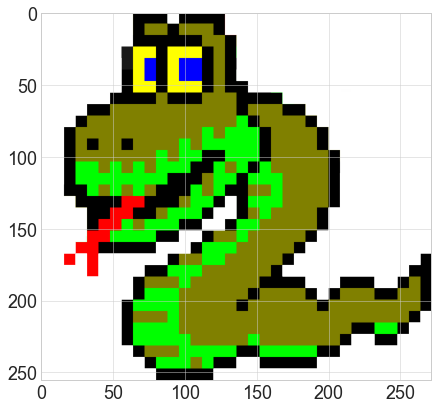

In [29]:
im = plt.imread("noviceml/img/old_python.png")
print(im.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

ax.imshow(im)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-8.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-8.pdf", format='pdf', bbox_inches='tight')

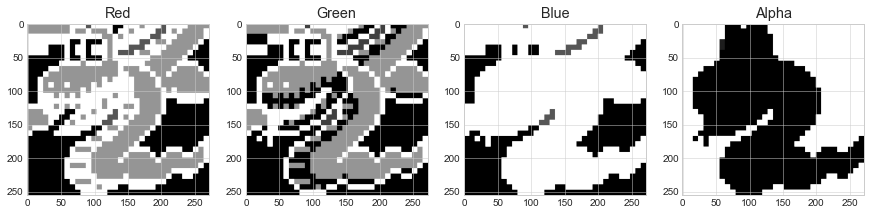

In [30]:
R = im[:,:,0]
G = im[:,:,1]
B = im[:,:,2]
A = im[:,:,3]

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(R)
ax1.set_title("Red")
ax2.imshow(G)
ax2.set_title("Green")
ax3.imshow(B)
ax3.set_title("Blue")
ax4.imshow(A)
ax4.set_title("Alpha")

plt.show()

if file_print == True :
    fig.savefig("imgs/chap7/fig7-9.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-9.pdf", format='pdf', bbox_inches='tight')

- 순서대로 빨강, 초록, 파랑을 나타냄 / 마지막은 투명도를 나타내는 값들

### 문서
- 게시물분류, 스팸메일 분류 등의 데이터는 문서
- 문서를 모델에 입력할 수 있는 형태로 만들기 위해 행렬 사용

In [31]:
docs = [
'This is the first document',
'This is the second document',
'And the third one',
'Is this the first document']

V = ['<NULL>', 'and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

- 문서에 나타내는 단어가 단어장의 몇 번째 단어인지 인덱스로 교체

In [32]:
pre_docs = list(map(lambda x : x.lower().split(), docs))
pre_docs

D = [[V.index(w) for w in doc] for doc in pre_docs ]

print(D)

[[9, 4, 7, 3, 2], [9, 4, 7, 6, 2], [1, 7, 8, 5], [4, 9, 7, 3, 2]]


- 문서의 크기가 모두 다르므로, 문서 길이를 통일하여 짧은 문서는 빈문자로 채워주고, 긴 문서는 잘라냄

In [34]:
N = max([len(doc) for doc in pre_docs]) #-----[1]
pre_docs = [doc + ['<NULL>']*(N-len(doc)) for doc in pre_docs] #-----[2]
pre_docs

[['this', 'is', 'the', 'first', 'document'],
 ['this', 'is', 'the', 'second', 'document'],
 ['and', 'the', 'third', 'one', '<NULL>'],
 ['is', 'this', 'the', 'first', 'document']]

In [35]:
# 숫자(인덱스)로 교체
D = [[V.index(w) for w in doc] for doc in pre_docs ]
D = np.array(D)
D

array([[9, 4, 7, 3, 2],
       [9, 4, 7, 6, 2],
       [1, 7, 8, 5, 0],
       [4, 9, 7, 3, 2]])

## 넘파이